# US cases by county

```
Author name: Daniel Alvarez
Author email: daniel.alvarez@ischool.berkeley.com
```

## Brief description

An ongoing repository of data on coronavirus cases and deaths in the U.S. from the New York Times

https://github.com/nytimes/covid-19-data

## Libraries and initial set-up

In [1]:
## Import packages.

# General tools & operations libraries
import re
import ast
import time
import csv
import itertools
import math
import random
import os
import sys
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta, date
from functools import reduce #for merge operations

# Plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set display of images in the notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%matplotlib notebook


# Import joblib
import joblib

In [2]:
# Set random seed for this project
random_seed = 224
random.seed(random_seed)

## Data ingestion

An ongoing repository of data on coronavirus cases and deaths in the U.S 

<https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html>

In [3]:
ls

US cases by county.ipynb  caedus_covid/
US cases by state.ipynb   covid-19-data/


In [4]:
d = pd.read_csv("./covid-19-data/us-counties 4.csv", sep=',', delimiter=None)

In [5]:
# Convert columns to str without spaces in lower case
d.columns = d.columns.str.replace('\s+', '_').str.lower()

In [6]:
d.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

## Data integrity

### Inspect the data

In [7]:
# Show number of rows and columns of each dataset
print(d.shape)

(389202, 6)


**Comment:** Do not find any null values in the data. 

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389202 entries, 0 to 389201
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    389202 non-null  object 
 1   county  389202 non-null  object 
 2   state   389202 non-null  object 
 3   fips    385297 non-null  float64
 4   cases   389202 non-null  int64  
 5   deaths  389202 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 17.8+ MB


In [9]:
d.head(3)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0


In [10]:
d.tail(3)

,date,county,state,fips,cases,deaths
389199,2020-07-31,Uinta,Wyoming,56041.0,254,1
389200,2020-07-31,Washakie,Wyoming,56043.0,47,5
389201,2020-07-31,Weston,Wyoming,56045.0,5,0


Inspect number of counties

In [11]:
len(np.unique(d['county']))

1914

In [12]:
np.unique(d['county'])

array(['Abbeville', 'Acadia', 'Accomack', ..., 'Zapata', 'Zavala',
       'Ziebach'], dtype=object)

Inspect number of states

In [13]:
# count number of  rows
len(np.unique(d['state']))

55

In [14]:
np.unique(d['state'])

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

Examine New York counties

In [15]:
d[d['state']=='New York']

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0
...,...,...,...,...,...,...
387861,2020-07-31,Washington,New York,36115.0,254,11
387862,2020-07-31,Wayne,New York,36117.0,245,1
387863,2020-07-31,Westchester,New York,36119.0,35932,1578
387864,2020-07-31,Wyoming,New York,36121.0,112,3


### Track duplicates

**Comment:** I find no duplicate rows across the data sets.

In [16]:
def dup_allrows(data):
    ''' This function generates the number of duplicative rows in the dataset'''
    data_dedup = data.drop_duplicates(keep='first')
    print(data_dedup.shape)
    print(len(data) - len(data_dedup))

In [17]:
dup_allrows(data=d)

(389202, 6)
0


**Comment:** There are no duplicates found.

In [18]:
variable = pd.Series(np.nan)

def dup_byvar(data):
    ''' Output the number of duplicates and percentage of duplicates for each variable in the dataset'''
    for var in data:
        variable = data[var]
    
        # construct variable dataframe less duplicates
        variable_dedup = variable.drop_duplicates(keep='first')

        # print the number of duplicates
        duplicates = len(variable) - len(variable_dedup)
        print(var)
        print('Number of duplicates: ', duplicates)

        # print the percentage of duplicates
        percentage = duplicates/len(data)
        print('Percentage of duplicates: ', percentage)

In [19]:
dup_byvar(data=d)

date
Number of duplicates:  389009
Percentage of duplicates:  0.9995041135451513
county
Number of duplicates:  387288
Percentage of duplicates:  0.9950822452094286
state
Number of duplicates:  389147
Percentage of duplicates:  0.9998586852071675
fips
Number of duplicates:  386012
Percentage of duplicates:  0.9918037420157142
cases
Number of duplicates:  377594
Percentage of duplicates:  0.9701748706327306
deaths
Number of duplicates:  387152
Percentage of duplicates:  0.9947328122671517


## Data engineering

Transform the accrual date to a date variable

In [20]:
#Extract the year, month and day from the accrual_date variable and create data variable
def datecreate(data):
    ''' Create variable from the accrual date variable'''
    data['year'] = data['date'].str[:4]
    data['month'] = data['date'].str[5:7]
    data['day'] = data['date'].str[8:]
    data['date_dt'] = pd.to_datetime(data['year']+data['month']+data['day'], format='%Y%m%d')
    data.drop(columns=['year','month','day'])

In [21]:
datecreate(data=d)

#drop unnecessary columns for analysis
d = d.drop(columns=['year','month','day'])

In [22]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389202 entries, 0 to 389201
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     389202 non-null  object        
 1   county   389202 non-null  object        
 2   state    389202 non-null  object        
 3   fips     385297 non-null  float64       
 4   cases    389202 non-null  int64         
 5   deaths   389202 non-null  int64         
 6   date_dt  389202 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 20.8+ MB


Check first and last dates in the time series and top date by count

In [23]:
def dates(data):
    print("First date of appearance:", min(data['date_dt']))
    print("Last date of appearance:", max(data['date_dt']))
    print("Top dates by count")
    print(data.date_dt.value_counts().sort_values(ascending=False).head())

In [24]:
dates(data=d)

First date of appearance: 2020-01-21 00:00:00
Last date of appearance: 2020-07-31 00:00:00
Top dates by count
2020-07-30    3218
2020-07-31    3217
2020-07-29    3217
2020-07-28    3216
2020-07-27    3214
Name: date_dt, dtype: int64


In [25]:
d.head()

,date,county,state,fips,cases,deaths,date_dt
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24


#### Top death count counties

In [26]:
agg_dict = {'deaths':[np.max],'cases':[np.max]}
d_aggbydeaths = d.groupby(['county','state']).agg(agg_dict).reset_index()

In [27]:
# rename columns
d_aggbydeaths.columns = ['county','state','total_deaths', 'total_cases']

# create a death rate variable
d_aggbydeaths['death_rate'] = d_aggbydeaths['total_deaths']/d_aggbydeaths['total_cases']

In [28]:
d_aggbydeaths = d_aggbydeaths.sort_values(['total_deaths'], ascending=False)

top10 = d_aggbydeaths.head(10)
top10

,county,state,total_deaths,total_cases,death_rate
2095,New York City,New York,23002,229834,0.100081
644,Cook,Illinois,4886,105493,0.046316
1740,Los Angeles,California,4621,188481,0.024517
3093,Wayne,Michigan,2804,27092,0.103499
2074,Nassau,New York,2706,43203,0.062635
902,Essex,New Jersey,2103,19731,0.106584
1812,Maricopa,Arizona,2054,117293,0.017512
200,Bergen,New Jersey,2046,20727,0.098712
2756,Suffolk,New York,2044,43224,0.047289
1941,Middlesex,Massachusetts,1978,25706,0.076947


In [29]:
top15 = d_aggbydeaths.head(15)
top15

,county,state,total_deaths,total_cases,death_rate
2095,New York City,New York,23002,229834,0.100081
644,Cook,Illinois,4886,105493,0.046316
1740,Los Angeles,California,4621,188481,0.024517
3093,Wayne,Michigan,2804,27092,0.103499
2074,Nassau,New York,2706,43203,0.062635
902,Essex,New Jersey,2103,19731,0.106584
1812,Maricopa,Arizona,2054,117293,0.017512
200,Bergen,New Jersey,2046,20727,0.098712
2756,Suffolk,New York,2044,43224,0.047289
1941,Middlesex,Massachusetts,1978,25706,0.076947


In [30]:
d_aggbydeaths.head(15)

,county,state,total_deaths,total_cases,death_rate
2095,New York City,New York,23002,229834,0.100081
644,Cook,Illinois,4886,105493,0.046316
1740,Los Angeles,California,4621,188481,0.024517
3093,Wayne,Michigan,2804,27092,0.103499
2074,Nassau,New York,2706,43203,0.062635
902,Essex,New Jersey,2103,19731,0.106584
1812,Maricopa,Arizona,2054,117293,0.017512
200,Bergen,New Jersey,2046,20727,0.098712
2756,Suffolk,New York,2044,43224,0.047289
1941,Middlesex,Massachusetts,1978,25706,0.076947


In [31]:
np.unique(top10['county'])

array(['Bergen', 'Cook', 'Essex', 'Los Angeles', 'Maricopa', 'Middlesex',
       'Nassau', 'New York City', 'Suffolk', 'Wayne'], dtype=object)

Pull the time series for the top 10 counties

In [32]:
d_top10 = pd.merge(d, top10, how='inner', on=['county', 'state'])
d_top10['death_rate'] = d_top10['deaths']/d_top10['cases']
d_top10

,date,county,state,fips,cases,deaths,date_dt,total_deaths,total_cases,death_rate
0,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24,4886,105493,0.000000
1,2020-01-25,Cook,Illinois,17031.0,1,0,2020-01-25,4886,105493,0.000000
2,2020-01-26,Cook,Illinois,17031.0,1,0,2020-01-26,4886,105493,0.000000
3,2020-01-27,Cook,Illinois,17031.0,1,0,2020-01-27,4886,105493,0.000000
4,2020-01-28,Cook,Illinois,17031.0,1,0,2020-01-28,4886,105493,0.000000
...,...,...,...,...,...,...,...,...,...,...
1594,2020-07-27,Essex,New Jersey,34013.0,19582,2103,2020-07-27,2103,19731,0.107395
1595,2020-07-28,Essex,New Jersey,34013.0,19623,2103,2020-07-28,2103,19731,0.107170
1596,2020-07-29,Essex,New Jersey,34013.0,19671,2100,2020-07-29,2103,19731,0.106756
1597,2020-07-30,Essex,New Jersey,34013.0,19684,2100,2020-07-30,2103,19731,0.106686


Transpose dataset to have death_rate for each top 10 county over time

In [33]:
d_top10_dr = d_top10[['date_dt','county','state','death_rate']]

In [34]:
d_top10_dr = d_top10_dr.pivot(index='date_dt', columns='county', values='death_rate')
d_top10_dr

county,Bergen,Cook,Essex,Los Angeles,Maricopa,Middlesex,Nassau,New York City,Suffolk,Wayne
date_dt,,,,,,,,,,
2020-01-24,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.099547,0.047035,0.107395,0.024854,0.016429,0.077138,0.062905,0.100420,0.047548,0.106355
2020-07-28,0.099301,0.046954,0.107170,0.024776,0.016887,0.077117,0.062844,0.100363,0.047485,0.105896
2020-07-29,0.098712,0.046769,0.106756,0.024626,0.016925,0.077188,0.062784,0.100254,0.047419,0.104589


Transpose dataset to have deaths for each top 10 county over time

In [35]:
d_top10_deaths = d_top10[['date_dt','county','state','deaths']]
d_top10_deaths = d_top10_deaths.pivot(index='date_dt', columns='county', values='deaths')
d_top10_deaths

county,Bergen,Cook,Essex,Los Angeles,Maricopa,Middlesex,Nassau,New York City,Suffolk,Wayne
date_dt,,,,,,,,,,
2020-01-24,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,2045.0,4845.0,2103.0,4375.0,1807.0,1959.0,2706.0,22970.0,2043.0,2785.0
2020-07-28,2046.0,4857.0,2103.0,4426.0,1882.0,1961.0,2706.0,22977.0,2043.0,2791.0
2020-07-29,2038.0,4864.0,2100.0,4516.0,1915.0,1971.0,2706.0,22982.0,2043.0,2794.0


Transpose dataset to have cases for each top 10 county over time

In [36]:
d_top10_cases = d_top10[['date_dt','county','state','cases']]
d_top10_cases = d_top10_cases.pivot(index='date_dt', columns='county', values='cases')
d_top10_cases

county,Bergen,Cook,Essex,Los Angeles,Maricopa,Middlesex,Nassau,New York City,Suffolk,Wayne
date_dt,,,,,,,,,,
2020-01-24,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,20543.0,103008.0,19582.0,176028.0,109988.0,25396.0,43017.0,228740.0,42967.0,26186.0
2020-07-28,20604.0,103441.0,19623.0,178642.0,111446.0,25429.0,43059.0,228939.0,43024.0,26356.0
2020-07-29,20646.0,104001.0,19671.0,183383.0,113148.0,25535.0,43100.0,229237.0,43084.0,26714.0


In [37]:
d_top10_dr.index[-30:]

DatetimeIndex(['2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='date_dt', freq=None)

In [38]:
d_top10_deaths.index[-30:]

DatetimeIndex(['2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='date_dt', freq=None)

In [39]:
d_top10_dr.columns

Index(['Bergen', 'Cook', 'Essex', 'Los Angeles', 'Maricopa', 'Middlesex',
       'Nassau', 'New York City', 'Suffolk', 'Wayne'],
      dtype='object', name='county')

#### Plot deaths and death rates in top death count counties 

<IPython.core.display.Javascript object>


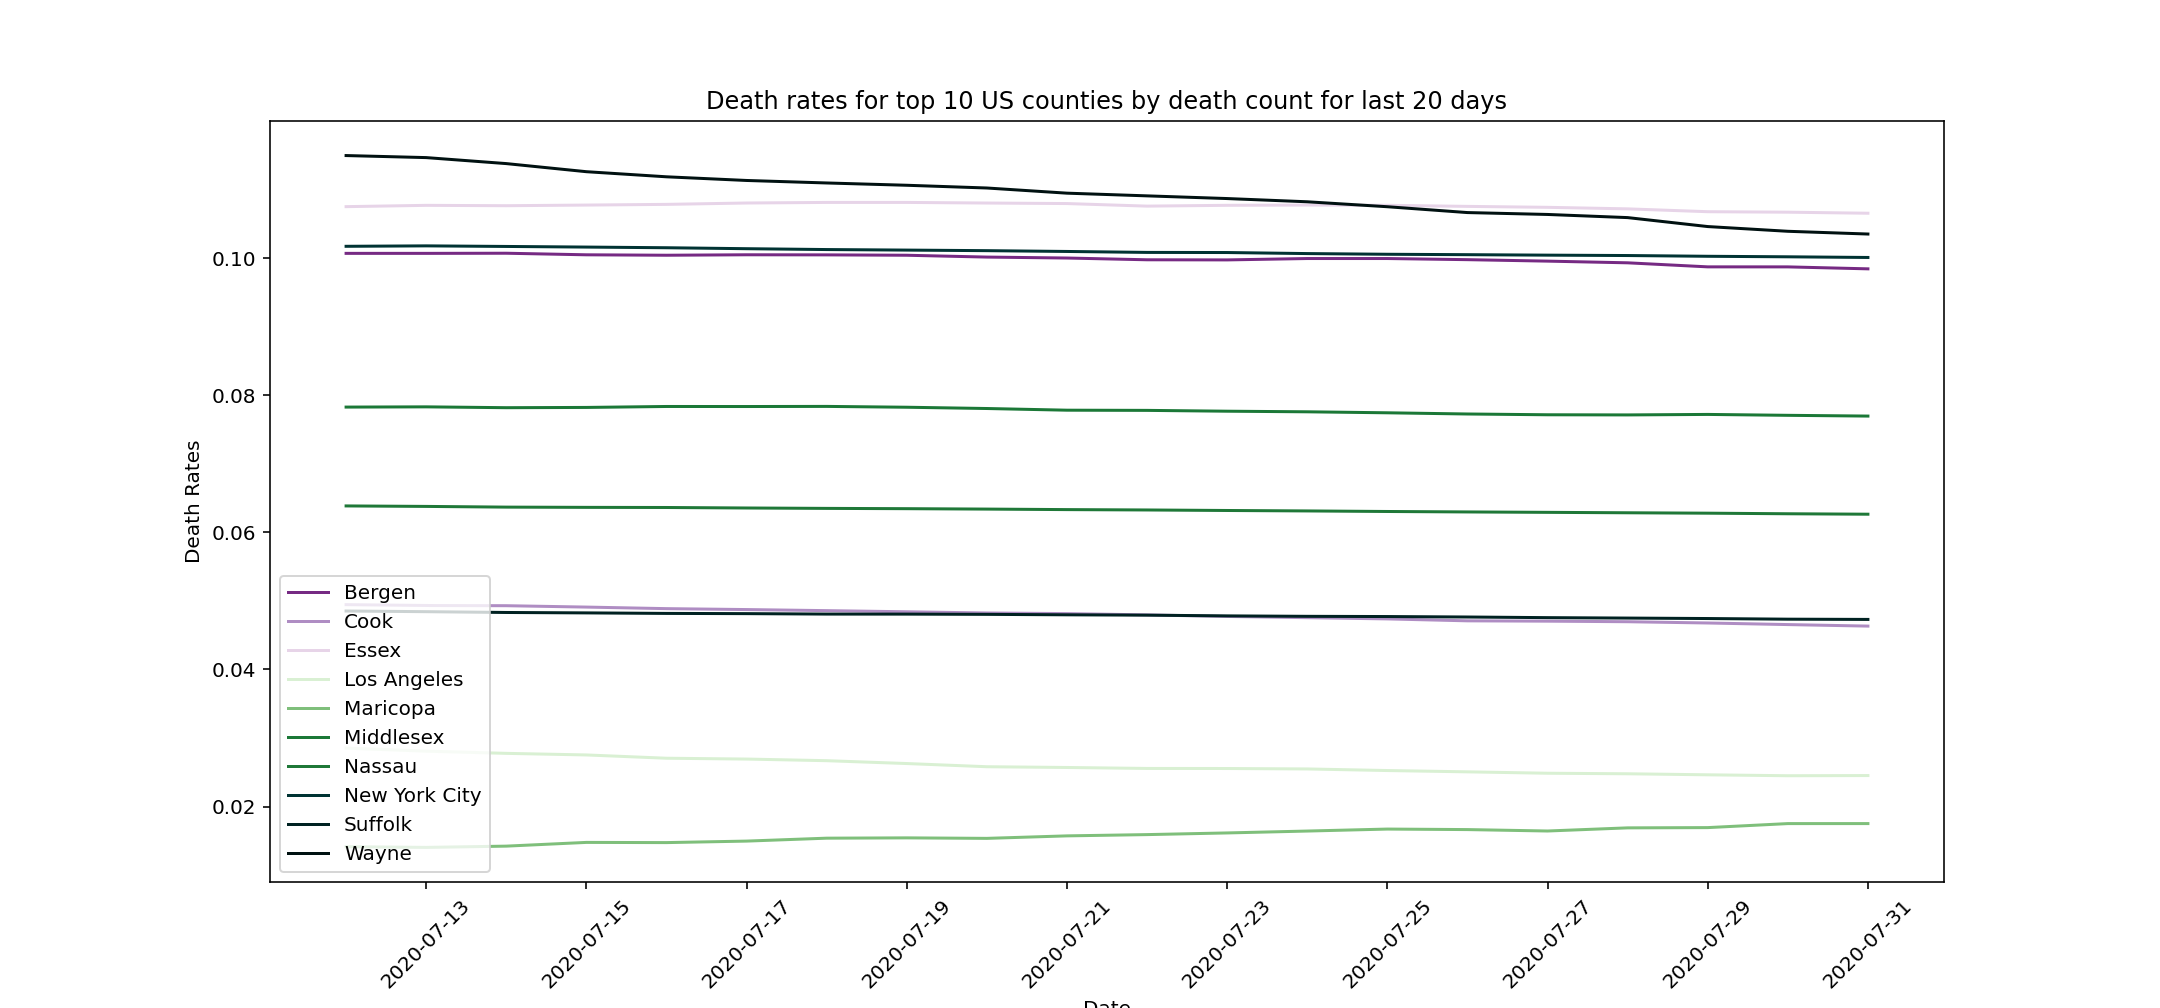

In [40]:
## Plot death rate for top 10 counties

palette_7 = ['#762a83','#af8dc3','#e7d4e8','#d9f0d3','#7fbf7b','#1b7837', '#1f7838', '#003333', '#002222', '#001111']
# Create y as values and x as the index
y0 = d_top10_dr[d_top10_dr.columns[0]][-20:]
y1 = d_top10_dr[d_top10_dr.columns[1]][-20:]
y2 = d_top10_dr[d_top10_dr.columns[2]][-20:]
y3 = d_top10_dr[d_top10_dr.columns[3]][-20:]
y4 = d_top10_dr[d_top10_dr.columns[4]][-20:]
y5 = d_top10_dr[d_top10_dr.columns[5]][-20:]
y6 = d_top10_dr[d_top10_dr.columns[6]][-20:]
y7 = d_top10_dr[d_top10_dr.columns[7]][-20:]
y8 = d_top10_dr[d_top10_dr.columns[8]][-20:]
y9 = d_top10_dr[d_top10_dr.columns[9]][-20:]

x = d_top10_dr.index[-20:]

# Set figure size.
fig, ax = plt.subplots(figsize=(15,7))

# Create plot.
ax.plot(x, y0, color=palette_7[0])
ax.plot(x, y1, color=palette_7[1])
ax.plot(x, y2, color=palette_7[2])
ax.plot(x, y3, color=palette_7[3])
ax.plot(x, y4, color=palette_7[4])
ax.plot(x, y5, color=palette_7[5])
ax.plot(x, y6, color=palette_7[6])
ax.plot(x, y7, color=palette_7[7])
ax.plot(x, y8, color=palette_7[8])
ax.plot(x, y9, color=palette_7[9])

# set ticklabels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(45)
    else:
        label.set_visible(False)

# Set legend: 
# ax.legend(["COVID Patients", "HC workers", "Nurses", "Physicians", "Med Techs", "Respiratory Therapists"])
#ax.legend()

# omit Unknown county
# ax.legend([d_top10_dr.columns[0], d_top10_dr.columns[1], d_top10_dr.columns[2], d_top10_dr.columns[3], d_top10_dr.columns[4],
#          d_top10_dr.columns[5], d_top10_dr.columns[6], d_top10_dr.columns[7], d_top10_dr.columns[8], d_top10_dr.columns[9]])

ax.legend([d_top10_dr.columns[0], d_top10_dr.columns[1], d_top10_dr.columns[2], d_top10_dr.columns[3], d_top10_dr.columns[4],
          d_top10_dr.columns[5], d_top10_dr.columns[6], d_top10_dr.columns[7], d_top10_dr.columns[8], d_top10_dr.columns[9]])

#Set title.
ax.set(title="Death rates for top 10 US counties by death count for last 20 days", xlabel="Date", ylabel="Death Rates")

# show plot.
plt.show()

In [41]:
## Plot death rate for top 10 counties

palette_7 = ['#762a83','#af8dc3','#e7d4e8','#d9f0d3','#7fbf7b','#1b7837', '#1f7838', '#003333', '#002222', '#001111']

def plotdeaths(data, title, ylabel):
    ''' Plot deaths and death rates for the top 10 US counties'''
    # Create y as values and x as the index
    y0 = data[data.columns[0]][-30:]
    y1 = data[data.columns[1]][-30:]
    y2 = data[data.columns[2]][-30:]
    y3 = data[data.columns[3]][-30:]
    y4 = data[data.columns[4]][-30:]
    y5 = data[data.columns[5]][-30:]
    y6 = data[data.columns[6]][-30:]
    y7 = data[data.columns[7]][-30:]
    y8 = data[data.columns[8]][-30:]
    y9 = data[data.columns[9]][-30:]

    x = data.index[-30:]

    # Set figure size.
    fig, ax = plt.subplots(figsize=(15,7))

    # Create plot.
    ax.plot(x, y0, color=palette_7[0])
    ax.plot(x, y1, color=palette_7[1])
    ax.plot(x, y2, color=palette_7[2])
    ax.plot(x, y3, color=palette_7[3])
    ax.plot(x, y4, color=palette_7[4])
    ax.plot(x, y5, color=palette_7[5])
    ax.plot(x, y6, color=palette_7[6])
    ax.plot(x, y7, color=palette_7[7])
    ax.plot(x, y8, color=palette_7[8])
    ax.plot(x, y9, color=palette_7[9])

    # set ticklabels
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 1 == 0:  # every 10th label is kept
            label.set_visible(True)
            label.set_rotation(45)
        else:
            label.set_visible(False)

    # Set legend
    #ax.legend([data.columns[0], data.columns[1], data.columns[2], data.columns[3], data.columns[4],
    #          data.columns[5], data.columns[6], data.columns[7], data.columns[8], data.columns[9]])

    ax.legend([data.columns[0], data.columns[1], data.columns[2], data.columns[3], data.columns[4],
              data.columns[5], data.columns[6], data.columns[7], data.columns[8], data.columns[9]])

    
    #Set title.
    ax.set(title=title, xlabel="Date", ylabel=ylabel)

    # show plot.
    plt.show()

<IPython.core.display.Javascript object>


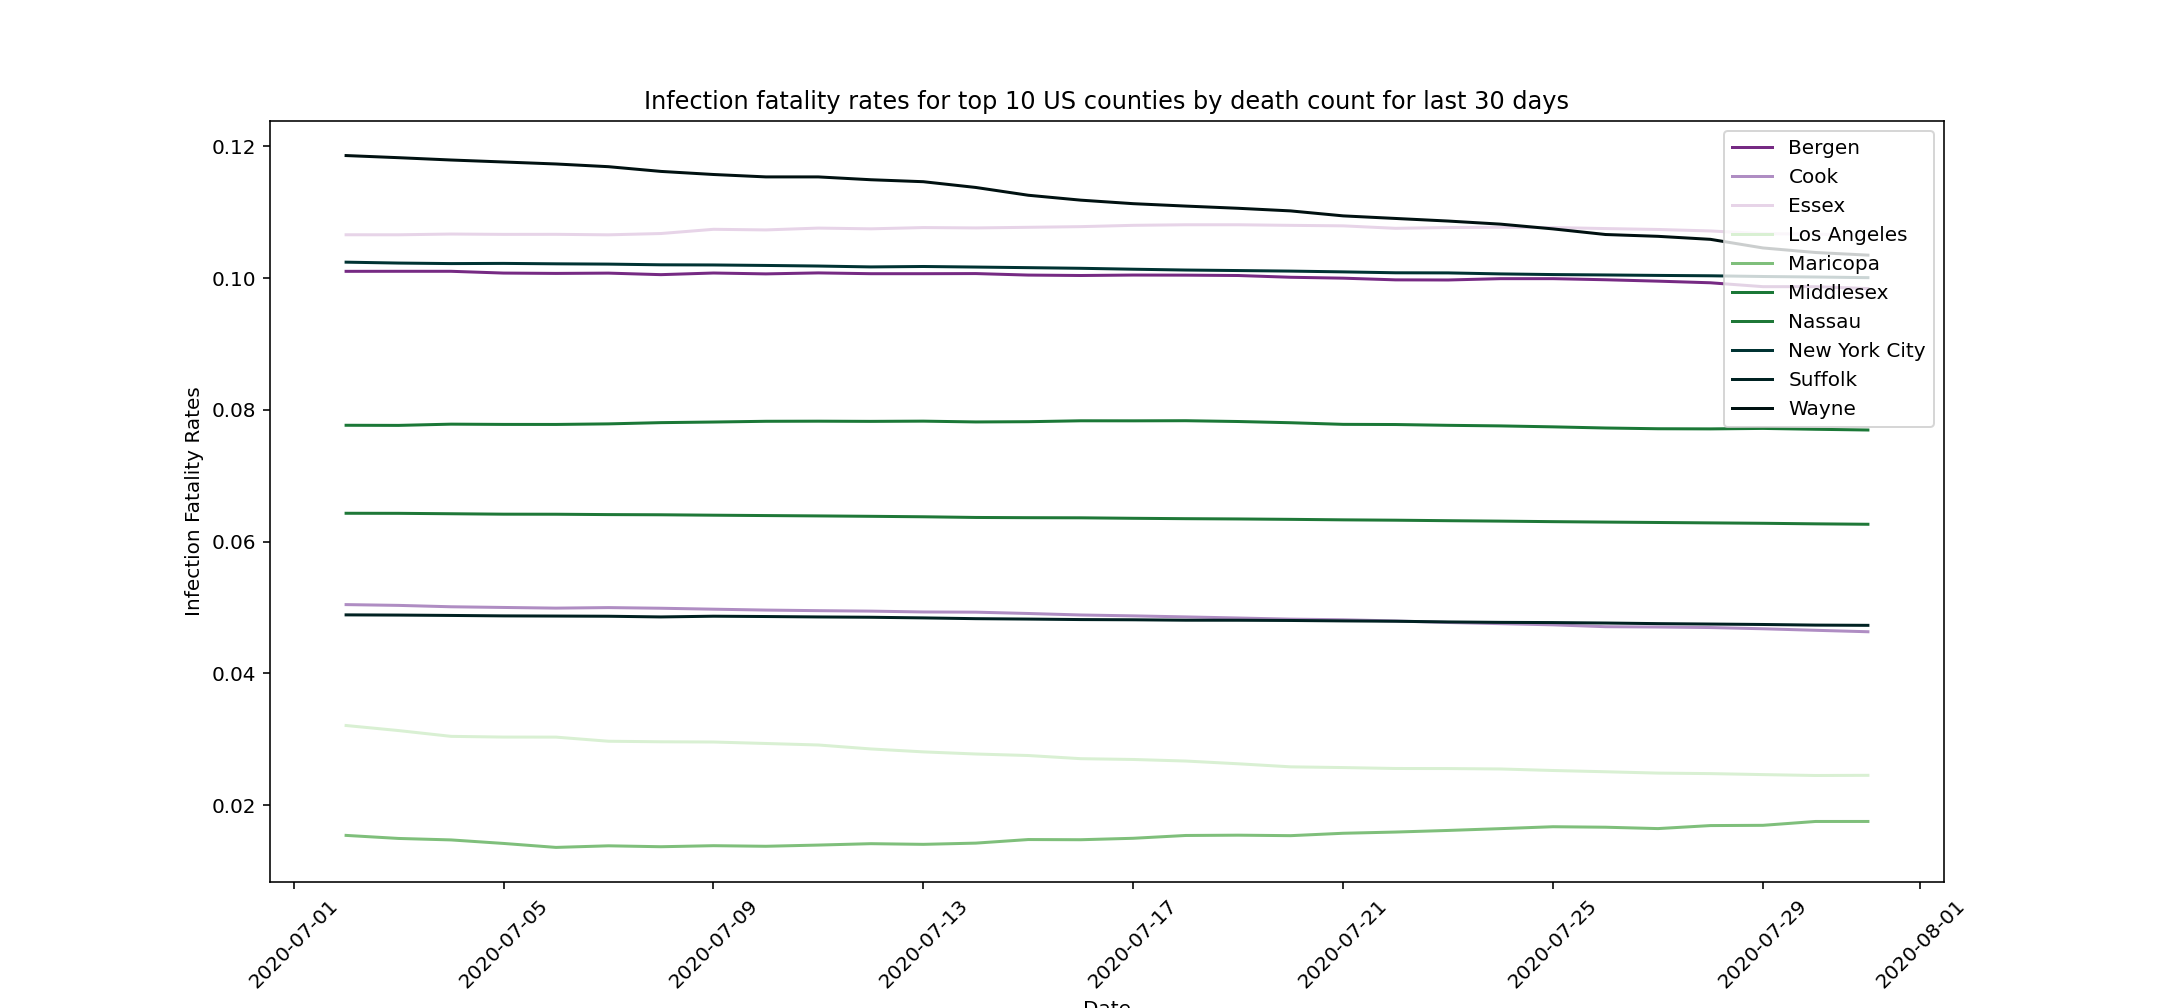

In [42]:
plotdeaths(data=d_top10_dr, title="Infection fatality rates for top 10 US counties by death count for last 30 days", ylabel="Infection Fatality Rates")

<IPython.core.display.Javascript object>


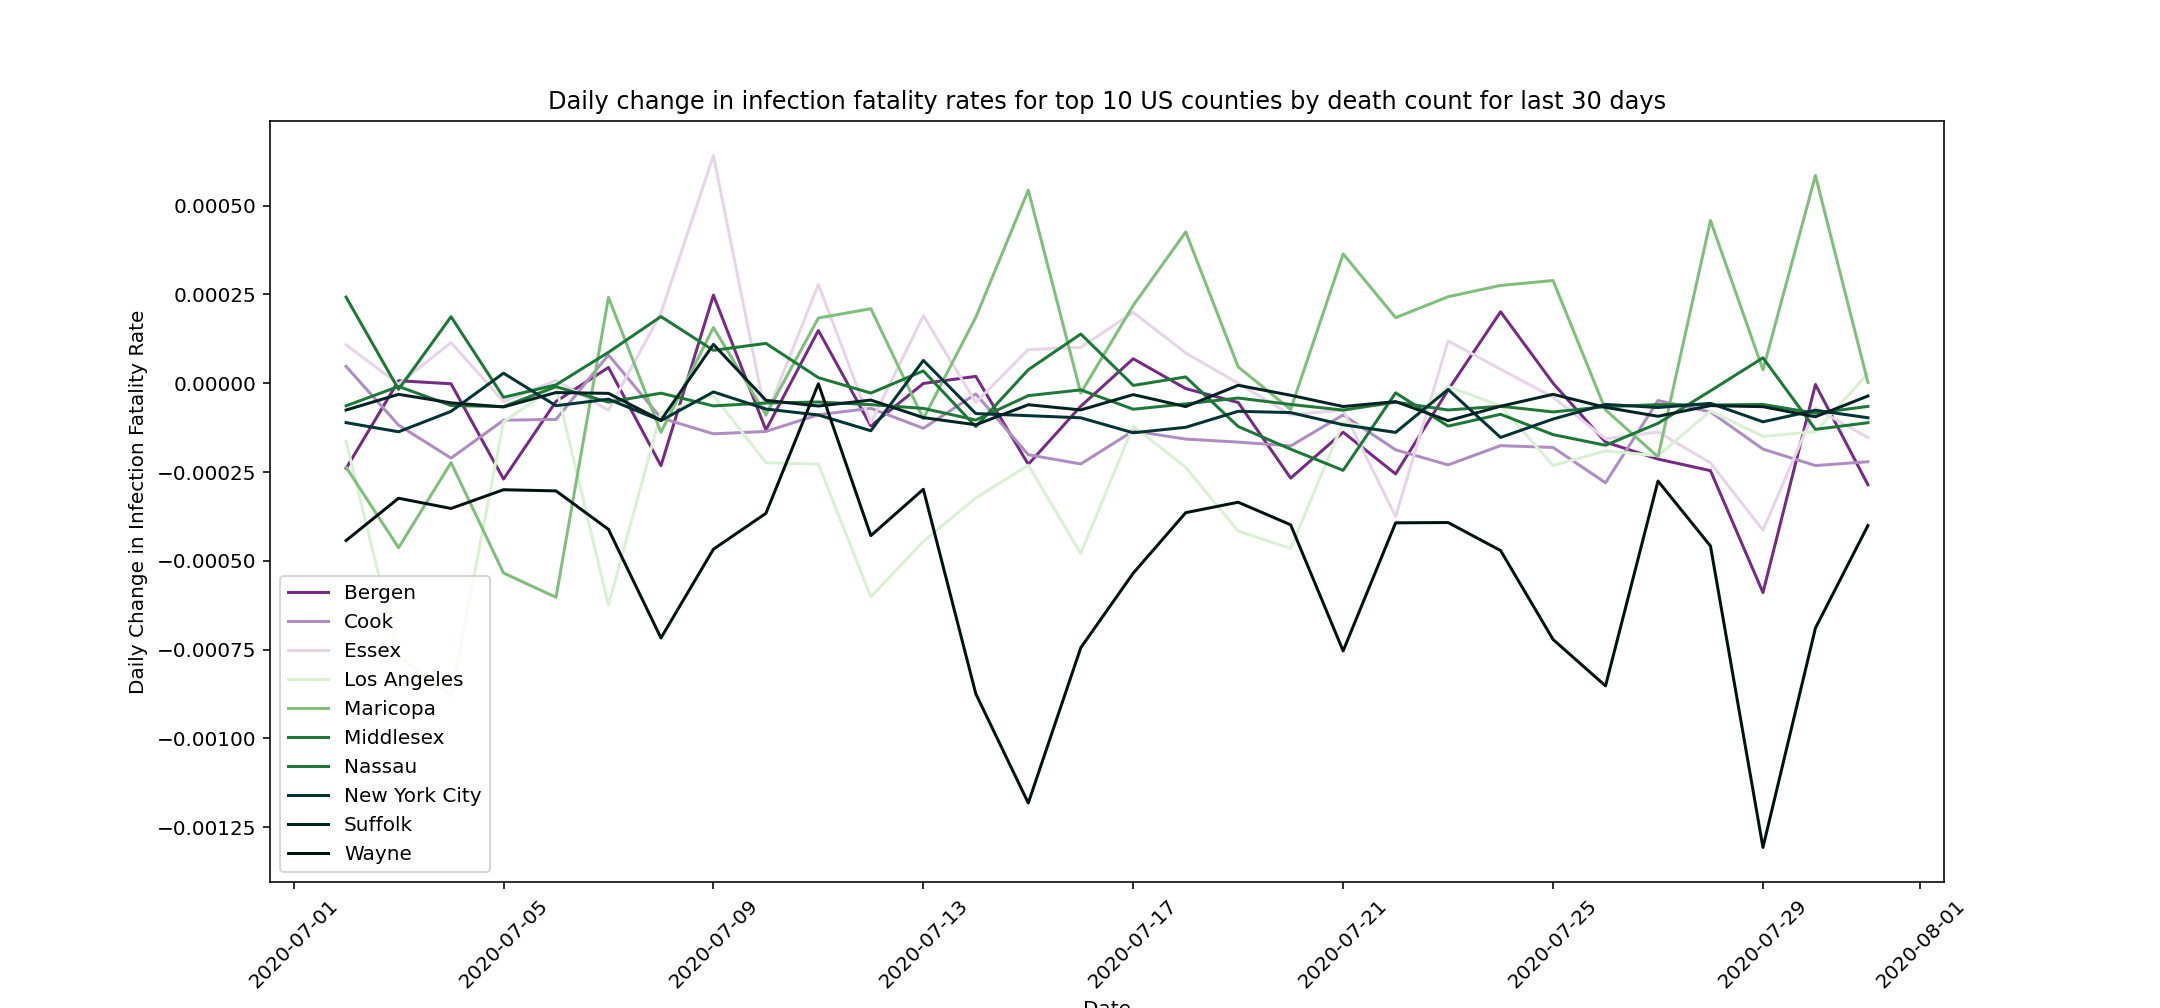

In [43]:
# plot the daily change in death rate
plotdeaths(data=d_top10_dr.diff(1), title="Daily change in infection fatality rates for top 10 US counties by death count for last 30 days", ylabel="Daily Change in Infection Fatality Rate")

<IPython.core.display.Javascript object>


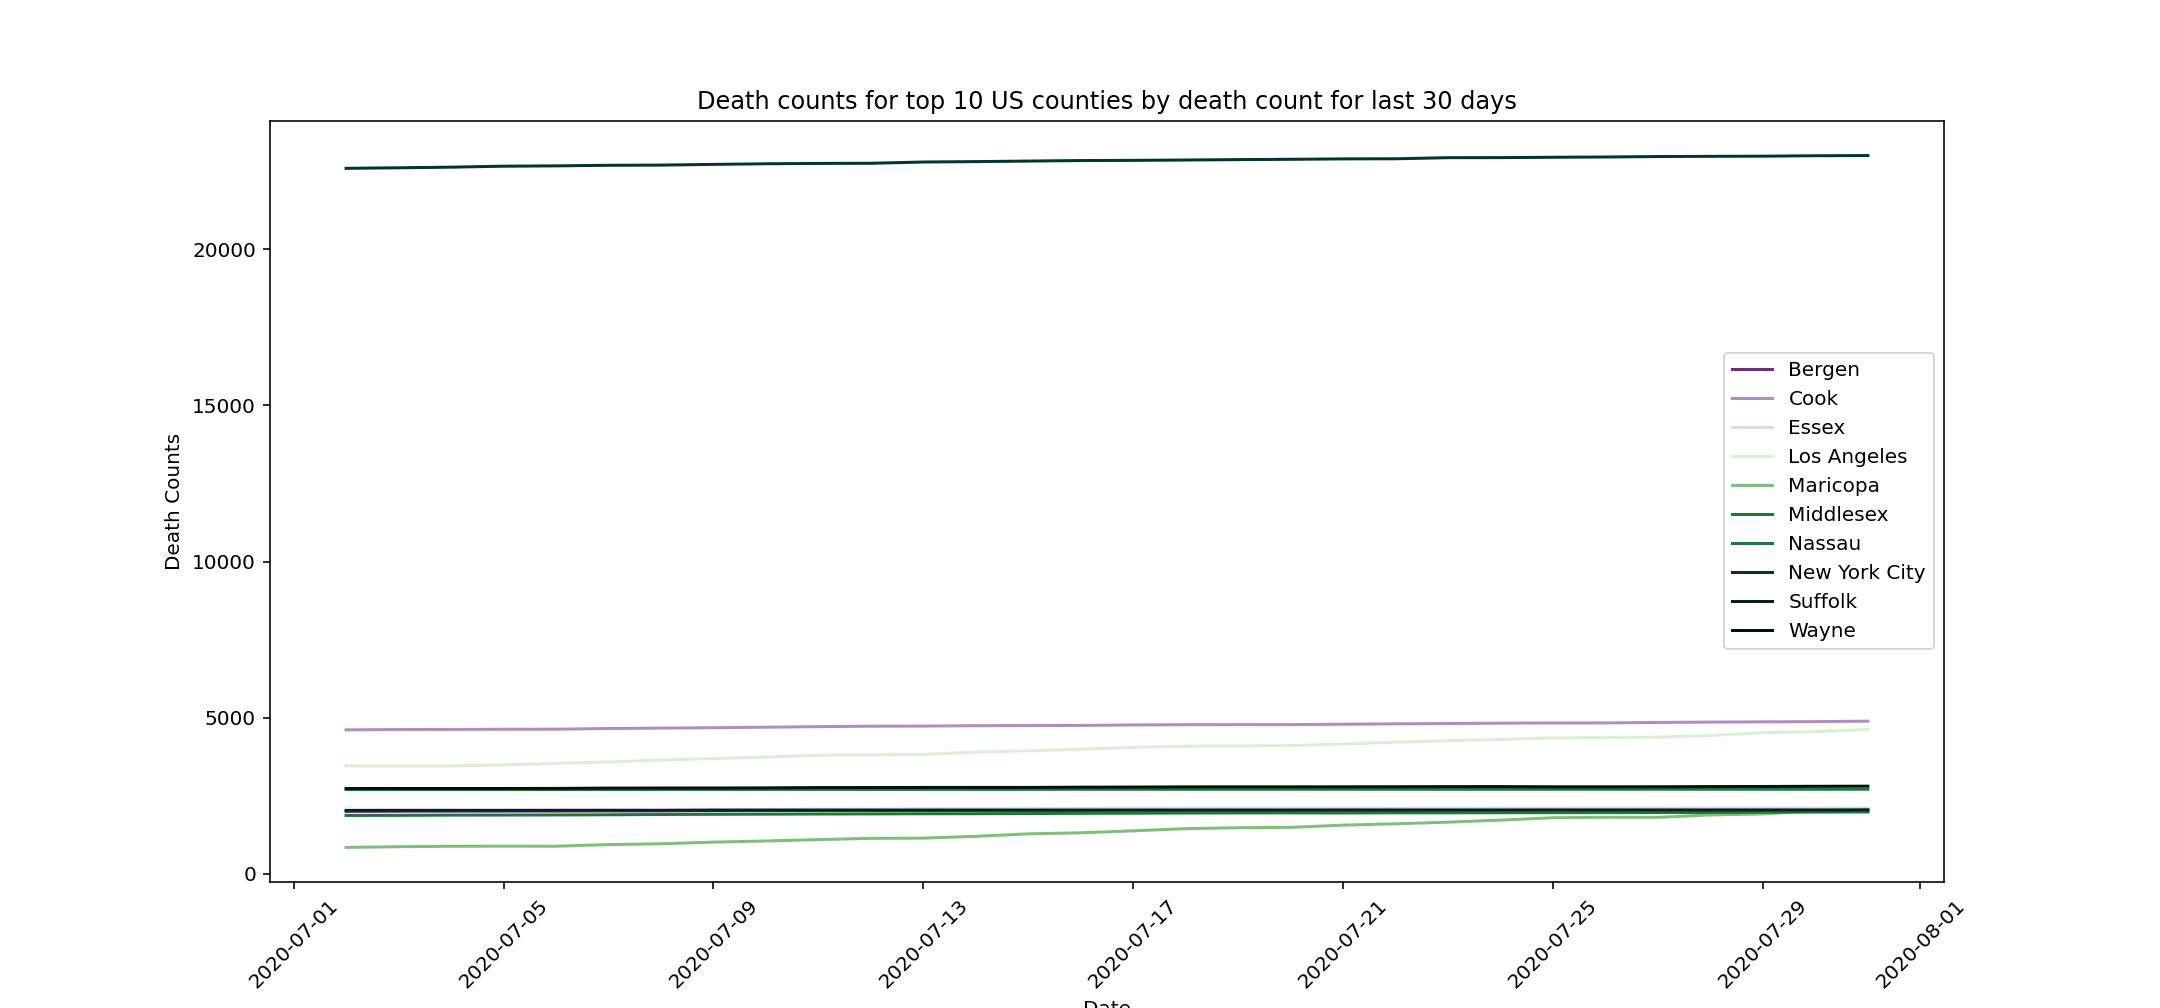

In [44]:
# plot death counts
plotdeaths(data=d_top10_deaths, title="Death counts for top 10 US counties by death count for last 30 days", ylabel="Death Counts")

<IPython.core.display.Javascript object>


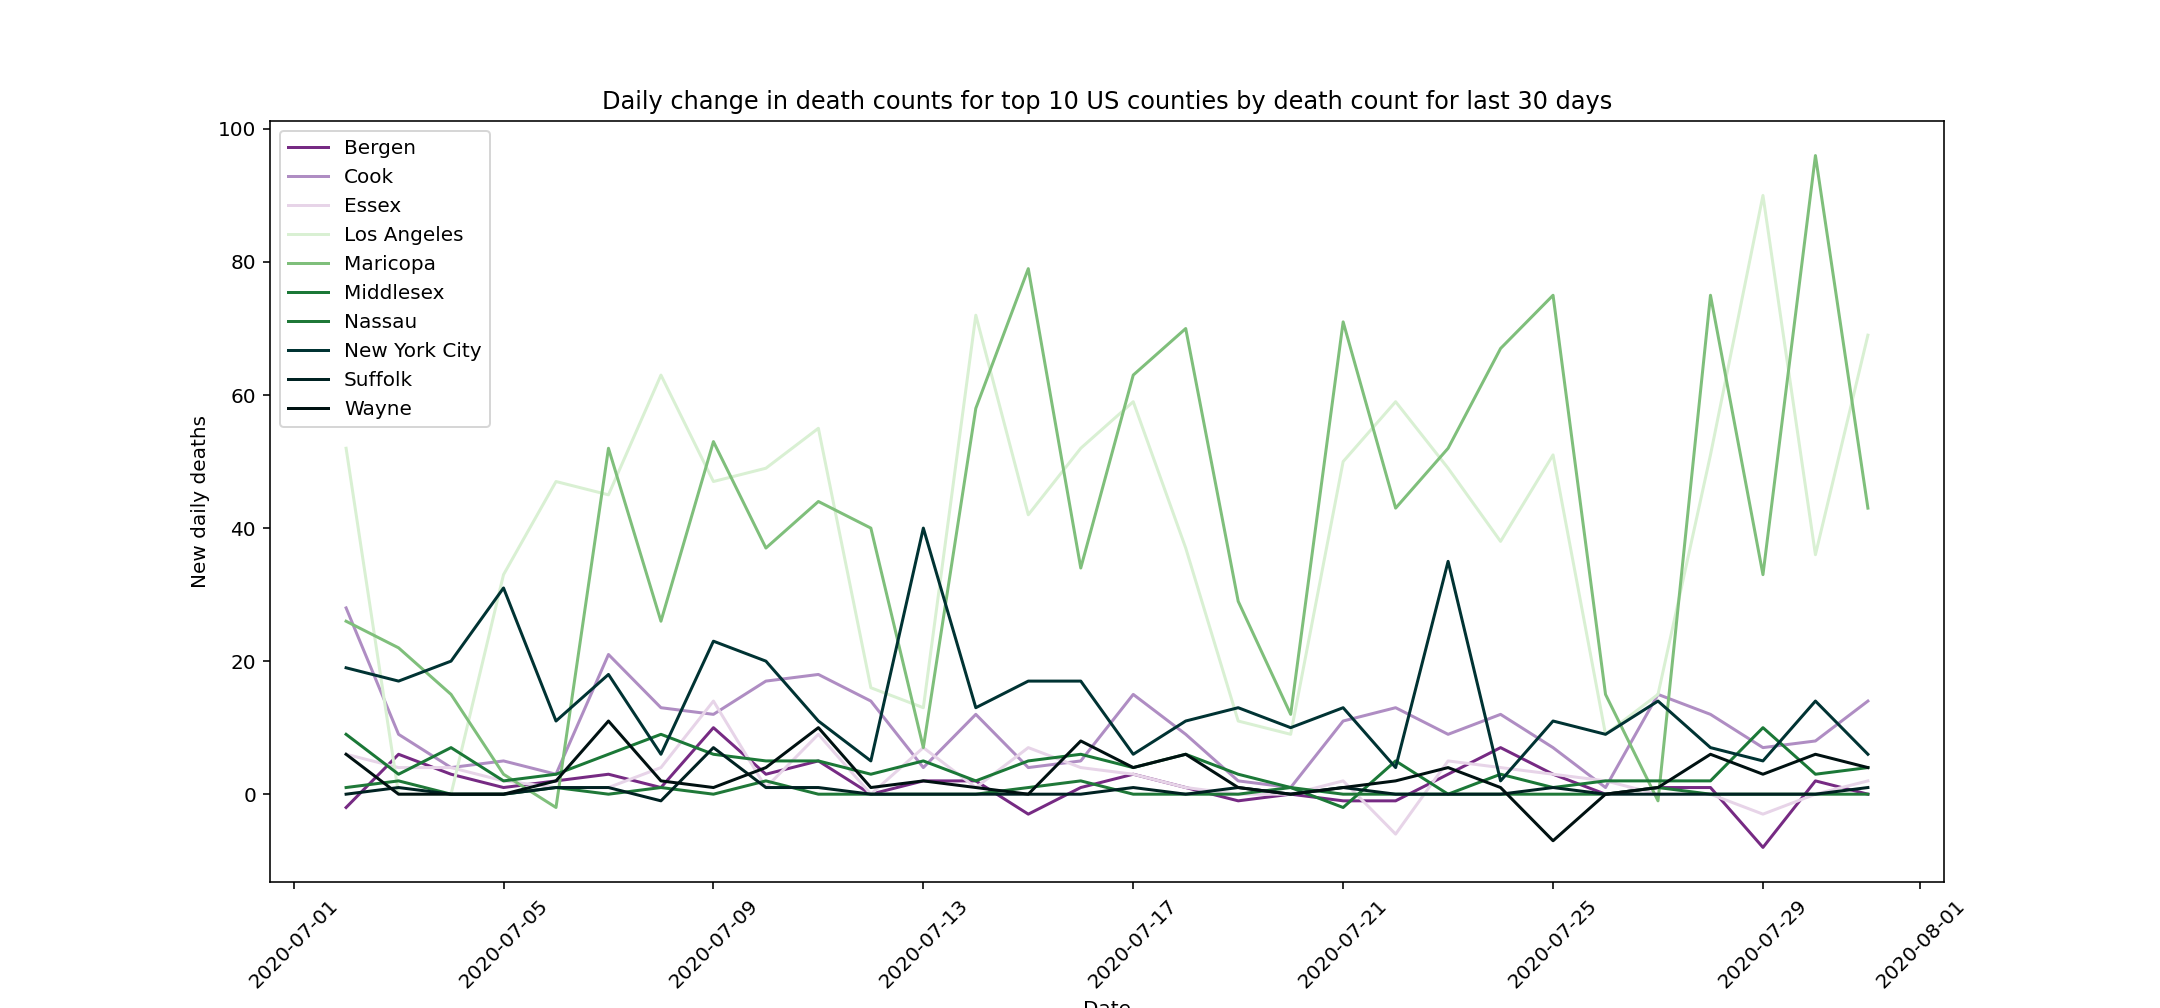

In [45]:
# plot daily change in death counts
plotdeaths(data=d_top10_deaths.diff(1), title="Daily change in death counts for top 10 US counties by death count for last 30 days", ylabel="New daily deaths")

<IPython.core.display.Javascript object>


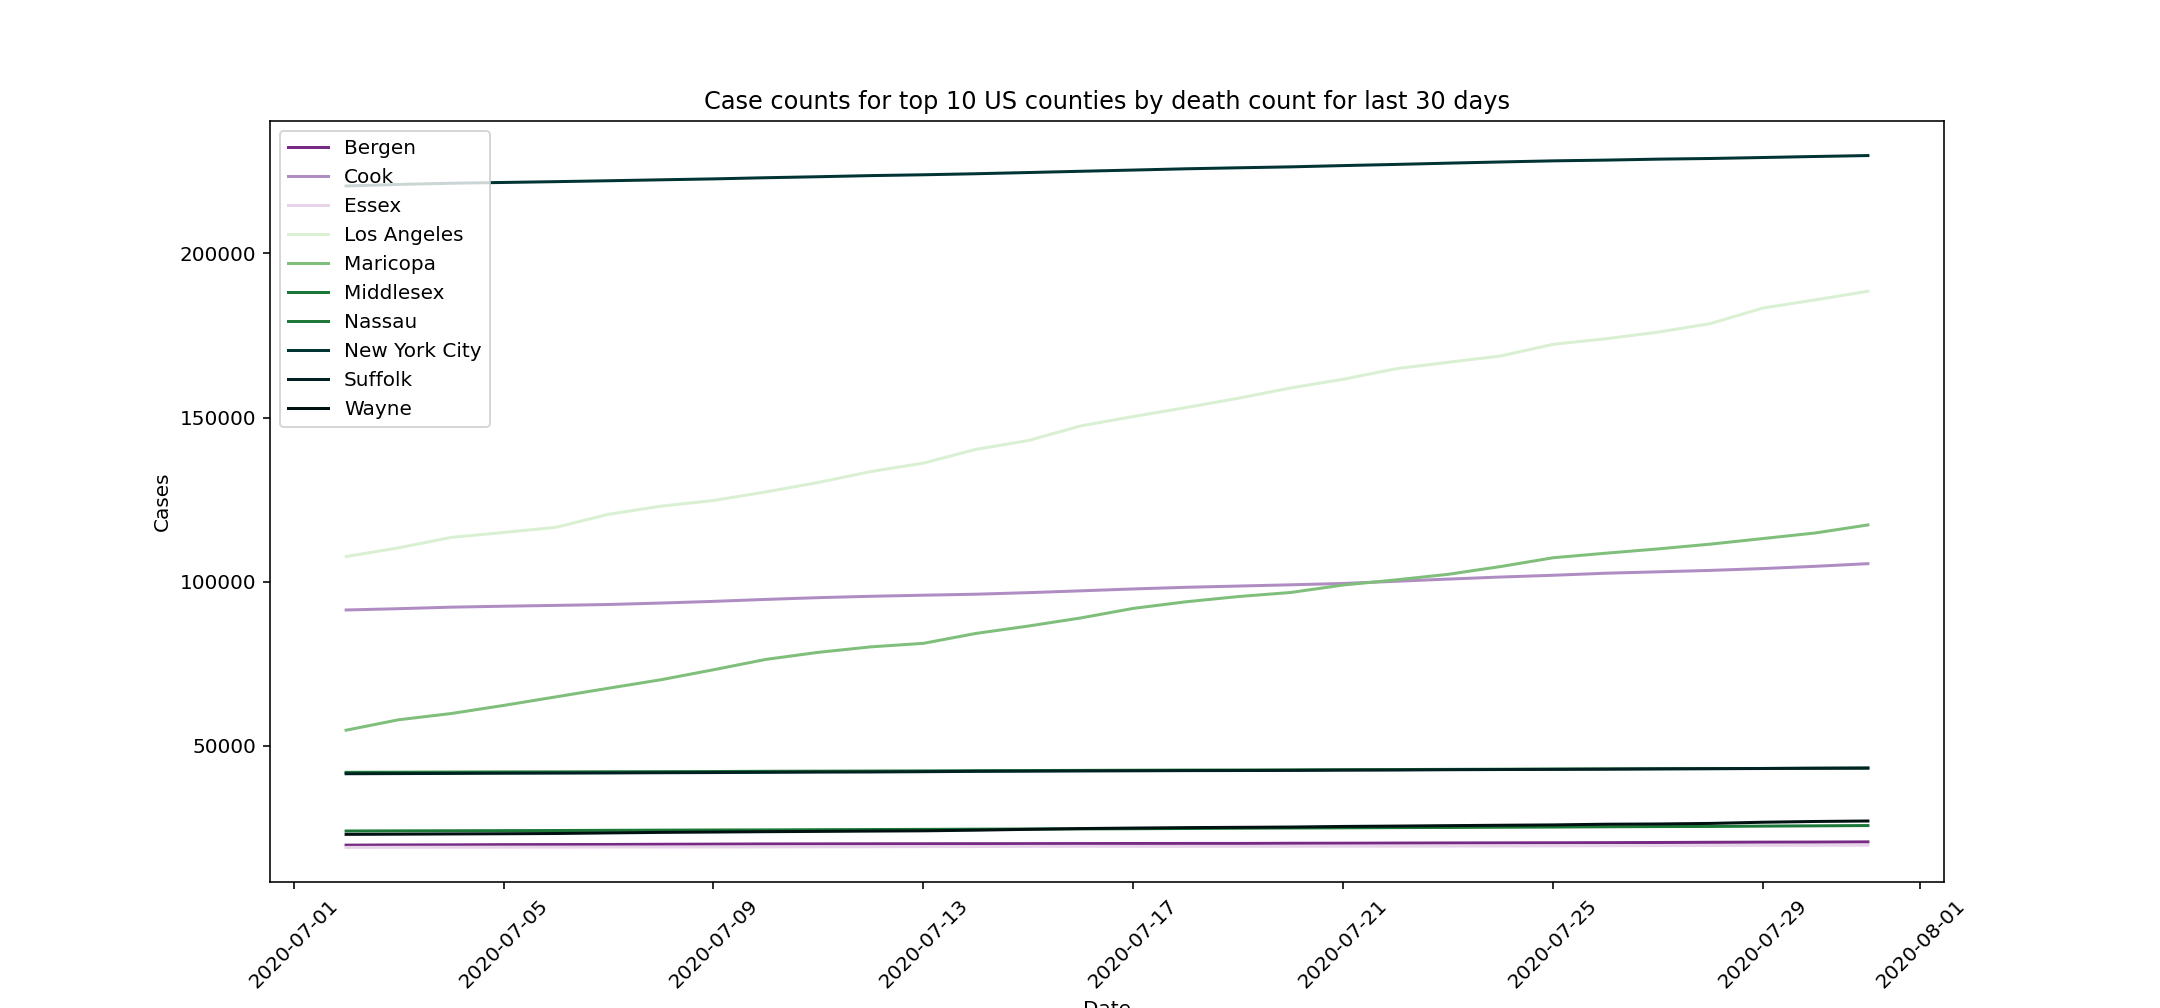

In [46]:
# plot case counts
plotdeaths(data=d_top10_cases, title="Case counts for top 10 US counties by death count for last 30 days", ylabel="Cases")

<IPython.core.display.Javascript object>


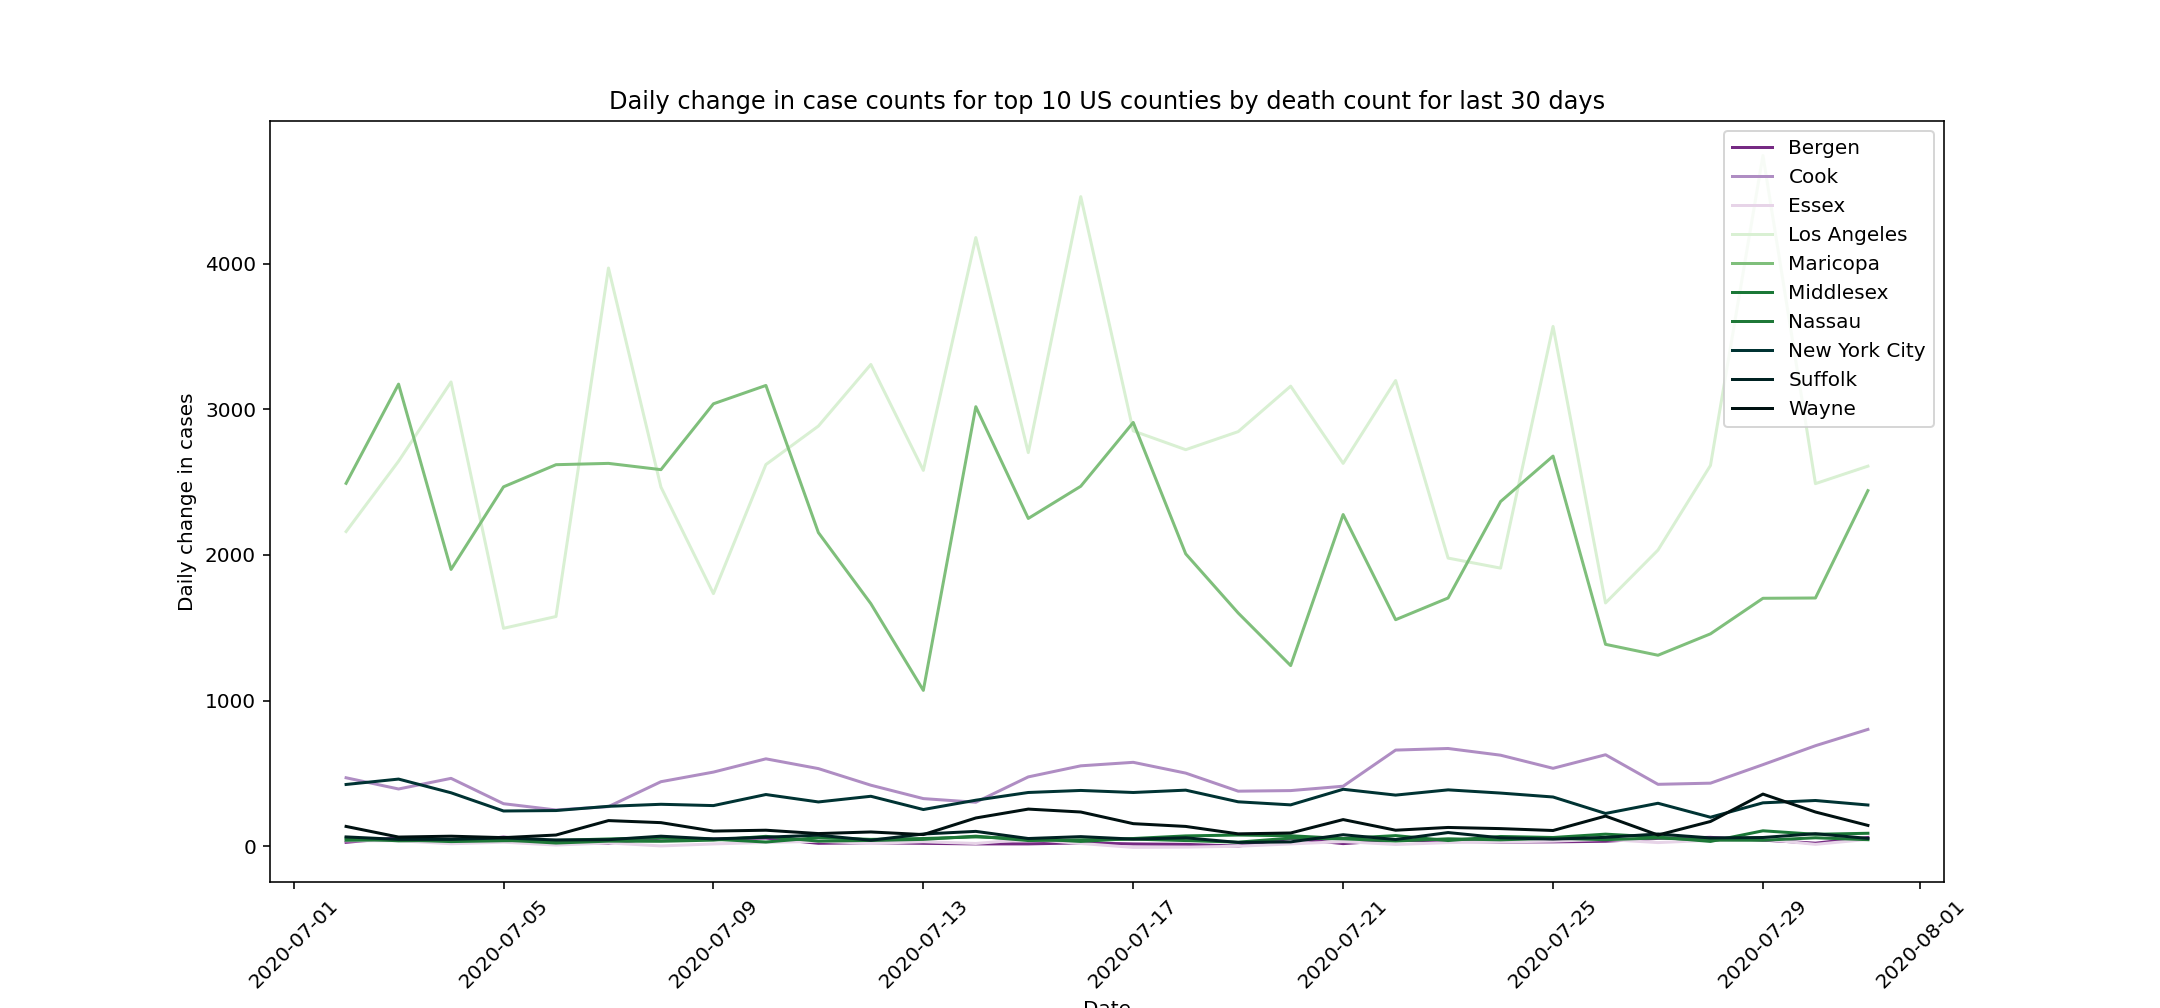

In [47]:
# plot daily change in case counts
plotdeaths(data=d_top10_cases.diff(1), title="Daily change in case counts for top 10 US counties by death count for last 30 days", ylabel="Daily change in cases")

### Florida analysis

In [48]:
fl = d_aggbydeaths[d_aggbydeaths.state=='Florida']
fl_top10 = fl.head(10)
fl_top10

,county,state,total_deaths,total_cases,death_rate
1939,Miami-Dade,Florida,1611,118461,0.013599
2219,Palm Beach,Florida,815,33272,0.024495
290,Broward,Florida,709,55411,0.012795
2306,Pinellas,Florida,432,16356,0.026412
1290,Hillsborough,Florida,335,29116,0.011506
1649,Lee,Florida,295,15415,0.019137
2328,Polk,Florida,268,12488,0.021461
2172,Orange,Florida,215,29010,0.007411
1805,Manatee,Florida,182,8517,0.021369
848,Duval,Florida,153,21038,0.007273


In [49]:
# pull time series for FL
fl_top10 = pd.merge(d, fl_top10, how='inner', on=['county', 'state'])
fl_top10['death_rate'] = fl_top10['deaths']/fl_top10['cases']
fl_top10.head()

,date,county,state,fips,cases,deaths,date_dt,total_deaths,total_cases,death_rate
0,2020-03-01,Hillsborough,Florida,12057.0,1,0,2020-03-01,335,29116,0.0
1,2020-03-02,Hillsborough,Florida,12057.0,1,0,2020-03-02,335,29116,0.0
2,2020-03-03,Hillsborough,Florida,12057.0,2,0,2020-03-03,335,29116,0.0
3,2020-03-04,Hillsborough,Florida,12057.0,2,0,2020-03-04,335,29116,0.0
4,2020-03-05,Hillsborough,Florida,12057.0,2,0,2020-03-05,335,29116,0.0


In [50]:
fl_top10_cases = fl_top10[['date_dt','county','state','cases']]
fl_top10_cases = fl_top10_cases.pivot(index='date_dt', columns='county', values='cases')
fl_top10_cases

county,Broward,Duval,Hillsborough,Lee,Manatee,Miami-Dade,Orange,Palm Beach,Pinellas,Polk
date_dt,,,,,,,,,,
2020-03-01,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2020-03-02,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2020-03-03,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2020-03-04,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2020-03-05,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,50784.0,20001.0,27483.0,14539.0,7982.0,107314.0,27392.0,30956.0,15339.0,11717.0
2020-07-28,51657.0,20138.0,27823.0,14715.0,8090.0,110351.0,27819.0,31596.0,15541.0,11893.0
2020-07-29,52970.0,20398.0,28268.0,14876.0,8187.0,113142.0,28190.0,32169.0,15800.0,12059.0


<IPython.core.display.Javascript object>


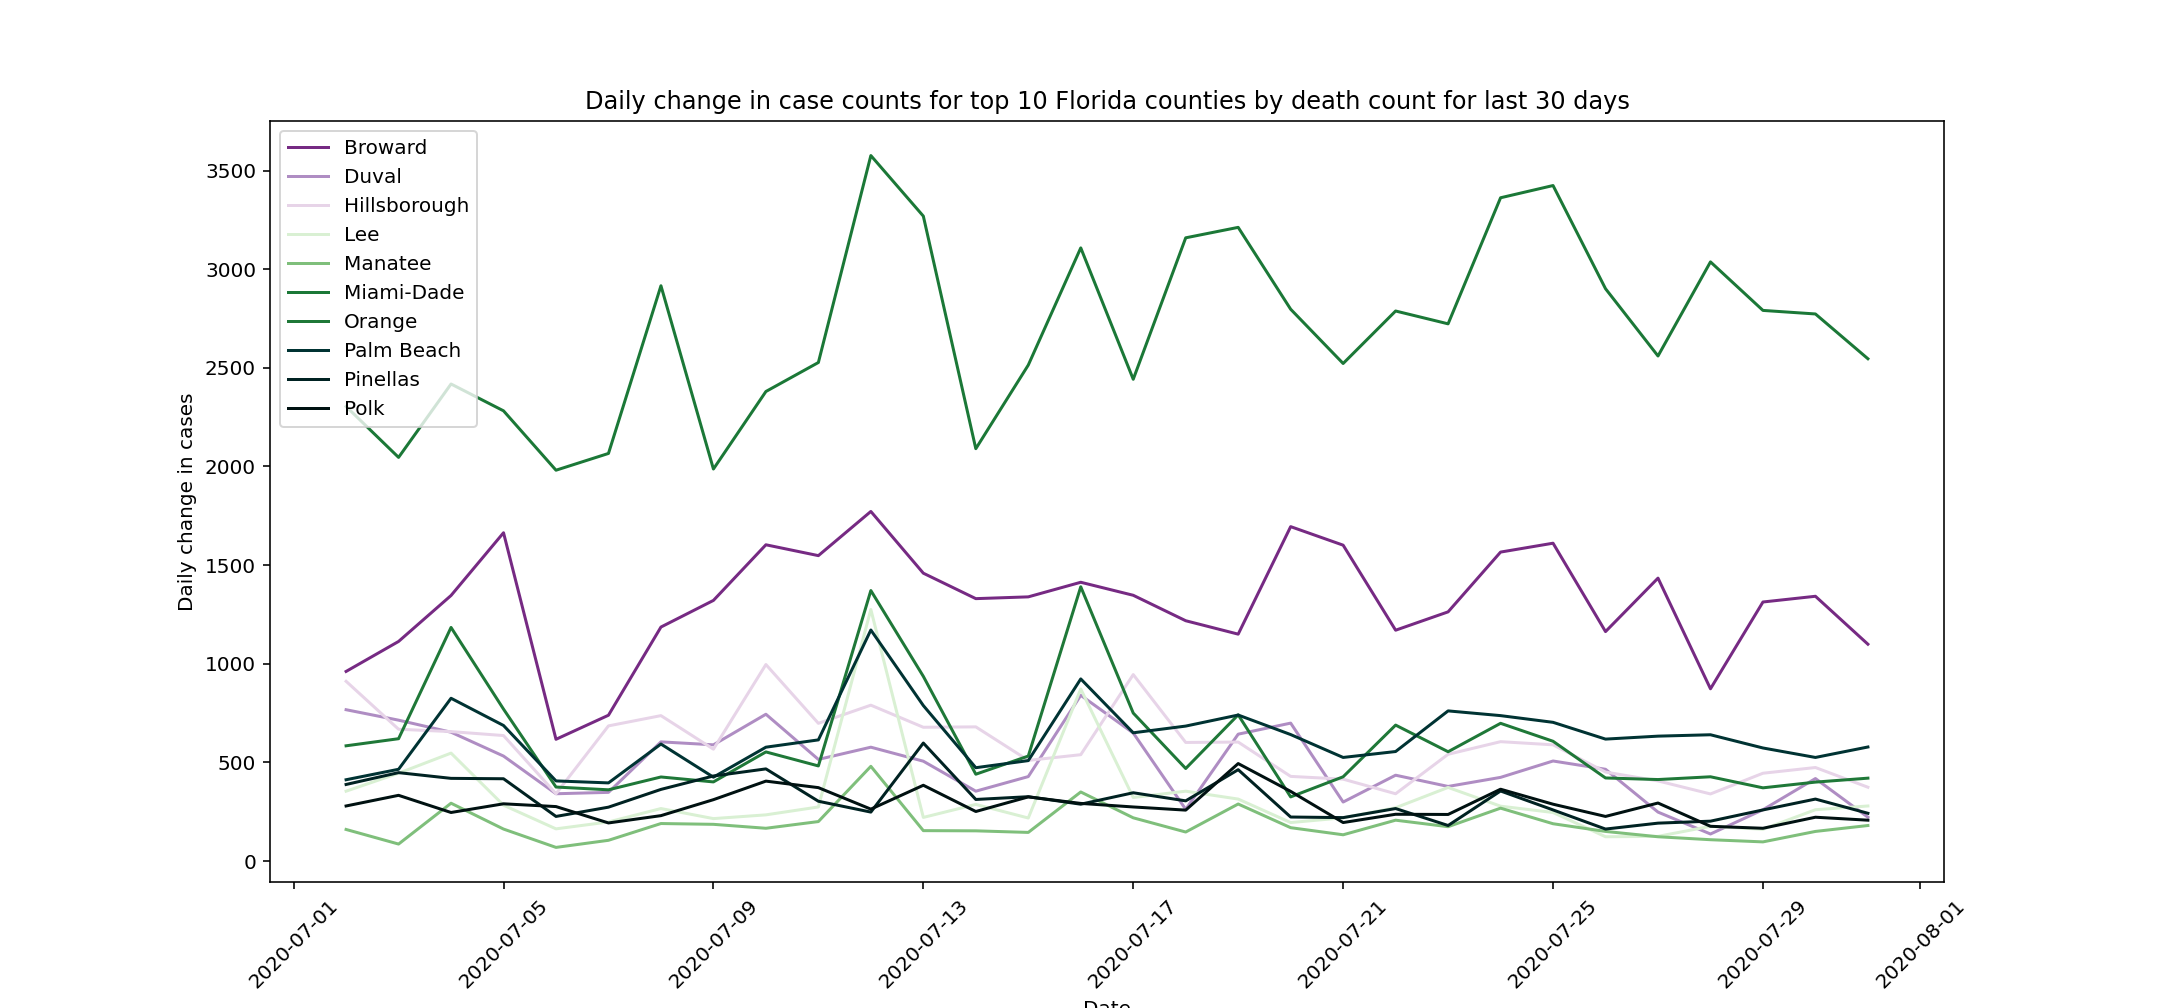

In [51]:
# plot daily change in case counts
plotdeaths(data=fl_top10_cases.diff(1), title="Daily change in case counts for top 10 Florida counties by death count for last 30 days", ylabel="Daily change in cases")

### California analysis

In [52]:
ca = d_aggbydeaths[d_aggbydeaths.state=='California']
ca_top10 = ca.head(10)
ca_top10

,county,state,total_deaths,total_cases,death_rate
1740,Los Angeles,California,4621,188481,0.024517
2466,Riverside,California,695,37308,0.018629
2171,Orange,California,618,36196,0.017074
2537,San Diego,California,561,29111,0.019271
2536,San Bernardino,California,419,32309,0.012969
1356,Imperial,California,209,9366,0.022315
2563,Santa Clara,California,192,9913,0.019369
30,Alameda,California,182,11324,0.016072
2877,Tulare,California,178,9454,0.018828
2541,San Joaquin,California,168,11483,0.014630


In [53]:
# pull time series for FL
ca_top10 = pd.merge(d, ca_top10, how='inner', on=['county', 'state'])
ca_top10['death_rate'] = ca_top10['deaths']/fl_top10['cases']
ca_top10.head()

,date,county,state,fips,cases,deaths,date_dt,total_deaths,total_cases,death_rate
0,2020-01-25,Orange,California,6059.0,1,0,2020-01-25,618,36196,0.0
1,2020-01-26,Orange,California,6059.0,1,0,2020-01-26,618,36196,0.0
2,2020-01-27,Orange,California,6059.0,1,0,2020-01-27,618,36196,0.0
3,2020-01-28,Orange,California,6059.0,1,0,2020-01-28,618,36196,0.0
4,2020-01-29,Orange,California,6059.0,1,0,2020-01-29,618,36196,0.0


In [54]:
ca_top10_cases = ca_top10[['date_dt','county','state','cases']]
ca_top10_cases = ca_top10_cases.pivot(index='date_dt', columns='county', values='cases')
ca_top10_cases

county,Alameda,Imperial,Los Angeles,Orange,Riverside,San Bernardino,San Diego,San Joaquin,Santa Clara,Tulare
date_dt,,,,,,,,,,
2020-01-25,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,10510.0,9162.0,176028.0,34646.0,35636.0,29545.0,27570.0,10675.0,9215.0,8534.0
2020-07-28,10666.0,9189.0,178642.0,34833.0,35910.0,29962.0,28068.0,10923.0,9359.0,8862.0
2020-07-29,10896.0,9241.0,183383.0,35272.0,36458.0,32309.0,28350.0,11209.0,9612.0,9076.0


<IPython.core.display.Javascript object>


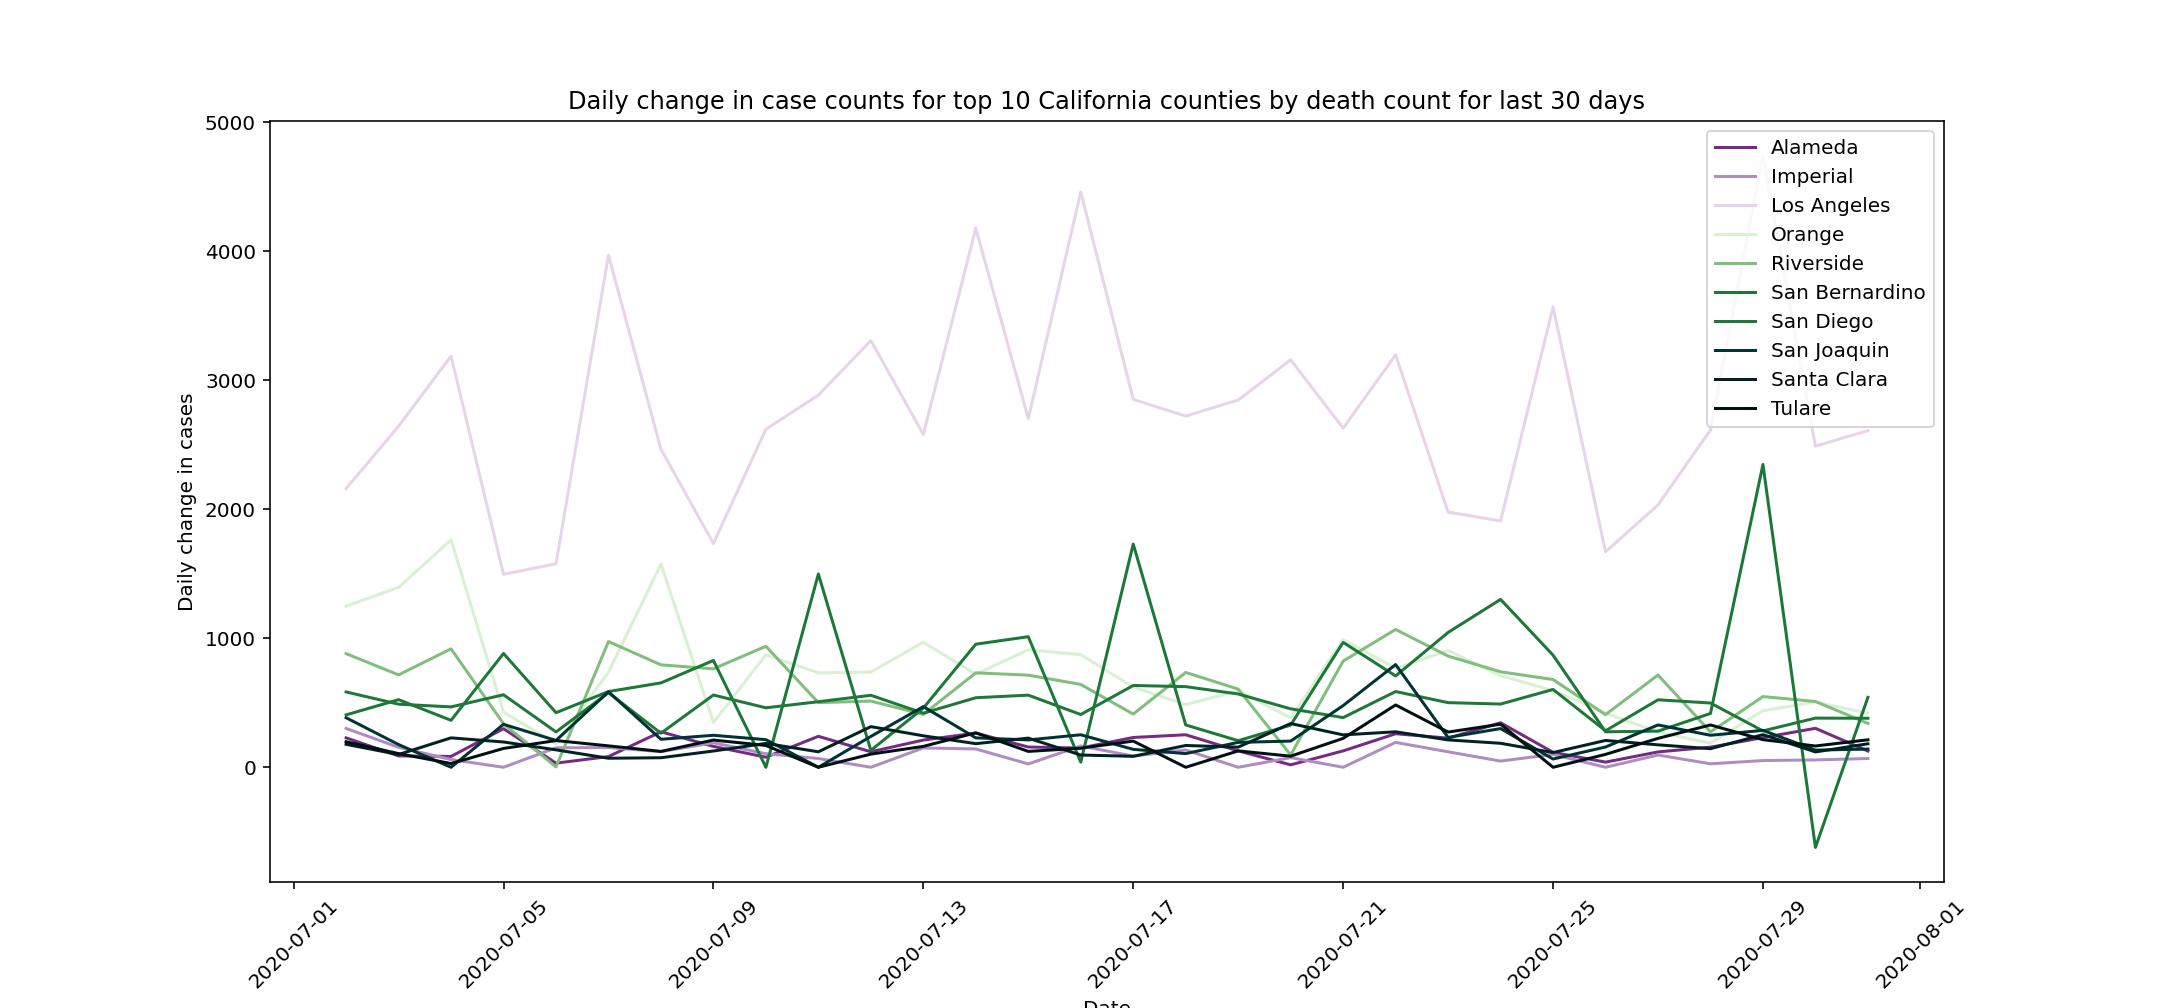

In [55]:
# plot daily change in case counts
plotdeaths(data=ca_top10_cases.diff(1), title="Daily change in case counts for top 10 California counties by death count for last 30 days", ylabel="Daily change in cases")